## Imports

In [1]:
import os
import glob
import json

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 12})

Load in the temperature and ${CO_2}$ profiles

In [2]:
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
fair_dict = f'{parent_dir}/data/ForestRisks_Zenodo/FaIR_output/fair_2300_dict.json'
fair_path = f'{parent_dir}/data/ForestRisks_Zenodo/FaIR_output'
emissions_path = f'{parent_dir}/data/ForestRisks_Zenodo/IMP_scenario_emissions_1750_2300.csv'

ren_list = glob.glob(fair_path + '/*C1-IMP-Ren_temp.dat')
neg_list = glob.glob(fair_path + '/*C2-IMP-Neg_temp.dat')
gs_list = glob.glob(fair_path + '/*C3-IMP-GS_temp.dat')

# CO2 CSVs with only chosen percentiles members
ren_co2 = glob.glob(fair_path + '/*C1-IMP-Ren_co2_conc.dat')
neg_co2 = glob.glob(fair_path + '/*C2-IMP-Neg_co2_conc.dat')
gs_co2 = glob.glob(fair_path + '/*C3-IMP-GS_co2_conc.dat')

# Collect CO2 CSVs with all percentiles members
ren_co2_all = glob.glob(fair_path + '/*C1-IMP-Ren_co2_conc.csv')[0]
neg_co2_all = glob.glob(fair_path + '/*C2-IMP-Neg_co2_conc.csv')[0]
gs_co2_all = glob.glob(fair_path + '/*C3-IMP-GS_co2_conc.csv')[0]

ren_co2_all = pd.read_csv(ren_co2_all)
neg_co2_all = pd.read_csv(neg_co2_all)
gs_co2_all = pd.read_csv(gs_co2_all)

Reformat said profiles

In [3]:
ren = []
neg = []
gs = []

ren_c = []
neg_c = []
gs_c = []

for (r, n, g) in zip(ren_list, neg_list, gs_list):
    df = pd.read_csv(r, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [r.split('/')[-1].split('_')[0]]
    ren.append(df)
    
    df = pd.read_csv(n, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [n.split('/')[-1].split('_')[0]]
    neg.append(df)
    
    df = pd.read_csv(g, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [g.split('/')[-1].split('_')[0]]
    gs.append(df)
    
for (r, n, g) in zip(ren_co2, neg_co2, gs_co2):
    df = pd.read_csv(r, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [r.split('/')[-1].split('_')[0]]
    ren_c.append(df)
    
    df = pd.read_csv(n, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [n.split('/')[-1].split('_')[0]]
    neg_c.append(df)
    
    df = pd.read_csv(g, delimiter=' ', names=['year', 'val'])
    df.drop('year', axis=1, inplace=True)
    df.columns = [g.split('/')[-1].split('_')[0]]
    gs_c.append(df)

ren = pd.concat(ren, axis=1)
neg = pd.concat(neg, axis=1)
gs = pd.concat(gs, axis=1)

ren_c = pd.concat(ren_c, axis=1)
neg_c = pd.concat(neg_c, axis=1)
gs_c = pd.concat(gs_c, axis=1)

Read in pathway emissions data

In [4]:
df = pd.read_csv(emissions_path)
# Ren = DeepElec_SSP2_ HighRE_Budg900, Neg = EN_NPi2020_400f_lowBECCS, GS = CO_Bridge

ren_df = df.loc[(df['scenario'] == 'DeepElec_SSP2_ HighRE_Budg900') & ((df['variable'].str.endswith('|CO2|Energy and Industrial Processes')) | (df['variable'].str.endswith('|CO2|AFOLU')))]
neg_df = df.loc[(df['scenario'] == 'EN_NPi2020_400f_lowBECCS') & ((df['variable'].str.endswith('|CO2|Energy and Industrial Processes')) | (df['variable'].str.endswith('|CO2|AFOLU')))]
gs_df = df.loc[(df['scenario'] == 'CO_Bridge') & ((df['variable'].str.endswith('|CO2|Energy and Industrial Processes')) | (df['variable'].str.endswith('|CO2|AFOLU')))]

time = np.arange(2000, 2300)

def calc_cumulative_emissions(df):
    emissions = np.sum(df.values[:, 5:], axis=0)
    cum_emissions_gt = np.cumsum(emissions) * 12/44/1000
    
    return cum_emissions_gt

ren_emissions = calc_cumulative_emissions(ren_df)
neg_emissions = calc_cumulative_emissions(neg_df)
gs_emissions = calc_cumulative_emissions(gs_df)
    

## Plot Supplementary Info Figure 1

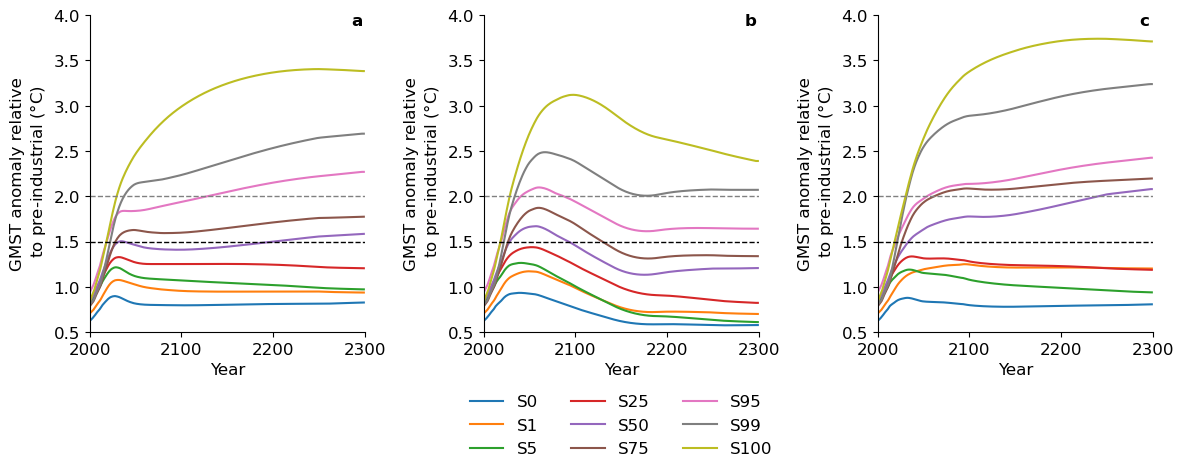

In [7]:
with open(fair_dict) as f:
    fair_d = json.load(f)
    
time = np.arange(2000, 2300)

fig = plt.figure(figsize=(12, 5))

#-----------------------------------------------#

ax = fig.add_subplot(131)
    
for x in fair_d['C1-IMP-Ren']:
    member = fair_d['C1-IMP-Ren'][x]
    ax.plot(time, ren[member][-300:], label=f'S{int(float(x)*100)}')
    
ax.axhline(1.5, linestyle='--', color='black', lw=1)
ax.axhline(2.0, linestyle='--', color='gray', lw=1)

ax.set_ylabel('GMST anomaly relative\n to pre-industrial ($\degree$C)')
ax.set_xlabel('Year')
ax.set_xlim([2000, 2300])
ax.set_ylim([0.5, 4.0])
ax.spines[['right', 'top']].set_visible(False)
ax.text(0.95, 0.97, 'a', transform=ax.transAxes, color='black', weight='bold')

# ax.legend(loc='upper left', edgecolor='none')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

#-----------------------------------------------#

ax = fig.add_subplot(132)
    
for x in fair_d['C2-IMP-Neg']:
    member = fair_d['C2-IMP-Neg'][x]
    ax.plot(time, neg[member][-300:], label=f'S{int(float(x)*100)}')
    
ax.axhline(1.5, linestyle='--', color='black', lw=1)
ax.axhline(2.0, linestyle='--', color='gray', lw=1)

ax.set_ylabel('GMST anomaly relative\n to pre-industrial ($\degree$C)')
ax.set_xlabel('Year')
ax.set_xlim([2000, 2300])
ax.set_ylim([0.5, 4.0])
ax.spines[['right', 'top']].set_visible(False)
ax.text(0.95, 0.97, 'b', transform=ax.transAxes, color='black', weight='bold')
ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=3)

#-----------------------------------------------#

ax = fig.add_subplot(133)
    
for x in fair_d['C3-IMP-GS']:
    member = fair_d['C3-IMP-GS'][x]
    ax.plot(time, gs[member][-300:], label=f'S{int(float(x)*100)}')
    
ax.axhline(1.5, linestyle='--', color='black', lw=1)
ax.axhline(2.0, linestyle='--', color='gray', lw=1)

ax.set_ylabel('GMST anomaly relative\n to pre-industrial ($\degree$C)')
ax.set_xlabel('Year')
ax.set_xlim([2000, 2300])
ax.set_ylim([0.5, 4.0])
ax.spines[['right', 'top']].set_visible(False)
ax.text(0.95, 0.97, 'c', transform=ax.transAxes, color='black', weight='bold')

plt.tight_layout()

## Plot Figure 1

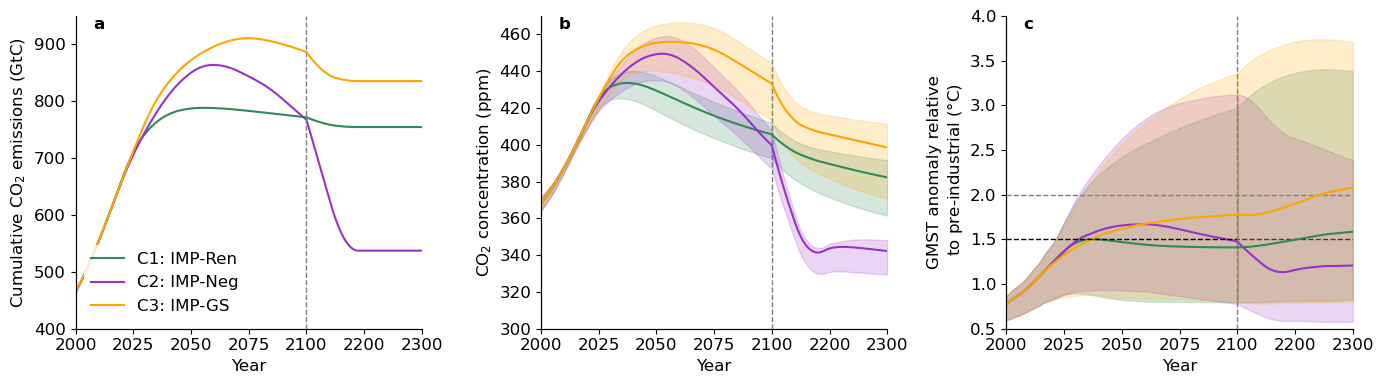

In [ ]:
with open(fair_dict) as f:
    fair_d = json.load(f)

scenarios = ['C1-IMP-Ren', 'C2-IMP-Neg', 'C3-IMP-GS']
gtemp_scens = [ren, neg, gs]
conc_scens = [ren_c, neg_c, gs_c]
conc_scens_all = [ren_co2_all, neg_co2_all, gs_co2_all]
colors = ['seagreen', 'darkorchid', 'orange']
time1 = np.arange(1750, 2101)
time2 = np.arange(2101, 2301)

fig = plt.figure(figsize=(14, 4))

#-----------------------------------------------#
# Cumulative emissions plot

ax = fig.add_subplot(131)
    
ax.plot(time1, ren_emissions[:len(time1)], color='seagreen', label='C1: IMP-Ren')
ax.plot(time1, neg_emissions[:len(time1)], color='darkorchid', label='C2: IMP-Neg')
ax.plot(time1, gs_emissions[:len(time1)], color='orange', label='C3: IMP-GS')

ax.set_ylabel('Cumulative CO$_2$ emissions (GtC)')
ax.set_xlabel('Year')
ax.set_xlim(2000, 2150)
ax.set_ylim(400,950)
ax.set_xticks([2000,2025,2050,2075,2100,2125,2150])
ax.set_xticklabels([2000,2025,2050,2075,2100,2200,2300])

ax.axvline(2100, linestyle='--', color='gray', lw=1)

ax.text(0.05, 0.96, 'a', transform=ax.transAxes, color='black', weight='bold')
ax.legend(loc='lower left', edgecolor='none')

ax2 = ax.twiny()

ax2.plot(time2, ren_emissions[len(time1):], color='seagreen')
ax2.plot(time2, neg_emissions[len(time1):], color='darkorchid')
ax2.plot(time2, gs_emissions[len(time1):], color='orange')

ax2.set_xlim(1700,2300)
ax2.set_ylim(400,950)
ax2.set_xticks([])
ax2.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)

#-----------------------------------------------#
# CO2 conc plot

ax = fig.add_subplot(132)
    
for i, (scen, col) in enumerate(zip(scenarios, colors)):
    s0 = fair_d[scen]['0.0']
    s50 = fair_d[scen]['0.5']
    s100 = fair_d[scen]['1.0']

    ax.plot(time1, conc_scens[i][s50][:len(time1)], color=col)
    ax.fill_between(time1, np.min(conc_scens_all[i].values[:, :len(time1)], axis=0), np.max(conc_scens_all[i].values[:, :len(time1)], axis=0), color=col, alpha=0.2)
    # ax.fill_between(time, conc_scens[i][s0][-len(time):], conc_scens[i][s100][-len(time):], color=col, alpha=0.2)

ax.set_ylabel('CO$_2$ concentration (ppm)')
ax.set_xlabel('Year')

ax.set_xlim(2000, 2150)
ax.set_ylim(300, 470)
ax.set_xticks([2000,2025,2050,2075,2100,2125,2150])
ax.set_xticklabels([2000,2025,2050,2075,2100,2200,2300])

ax.axvline(2100, linestyle='--', color='gray', lw=1)

ax.text(0.05, 0.96, 'b', transform=ax.transAxes, color='black', weight='bold')

ax2 = ax.twiny()

for i, (scen, col) in enumerate(zip(scenarios, colors)):
    s0 = fair_d[scen]['0.0']
    s50 = fair_d[scen]['0.5']
    s100 = fair_d[scen]['1.0']

    ax2.plot(time2, conc_scens[i][s50][len(time1):-2], color=col)
    ax2.fill_between(time2, np.min(conc_scens_all[i].values[:, len(time1):-1], axis=0), np.max(conc_scens_all[i].values[:, len(time1):-1], axis=0), color=col, alpha=0.2)
    # ax.fill_between(time, conc_scens[i][s0][-len(time):], conc_scens[i][s100][-len(time):], color=col, alpha=0.2)

ax2.set_xlim(1700,2300)
ax2.set_ylim(300, 470)
ax2.set_xticks([])
ax2.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)

#-----------------------------------------------#
# GMST plot

ax = fig.add_subplot(133)
    
for i, (scen, col) in enumerate(zip(scenarios, colors)):
    s0 = fair_d[scen]['0.0']
    s50 = fair_d[scen]['0.5']
    s100 = fair_d[scen]['1.0']

    ax.plot(time1, gtemp_scens[i][s50][:len(time1)], color=col)
    ax.fill_between(time1, np.min(gtemp_scens[i][:][:len(time1)], axis=1), np.max(gtemp_scens[i][:][:len(time1)], axis=1), color=col, alpha=0.2)
    
ax.axhline(1.5, linestyle='--', color='black', lw=1)
ax.axhline(2.0, linestyle='--', color='gray', lw=1)
ax.axvline(2100, linestyle='--', color='gray', lw=1)

ax.set_ylabel('GMST anomaly relative\n to pre-industrial ($\degree$C)')
ax.set_xlabel('Year')
ax.set_xlim(2000, 2150)
ax.set_xticks([2000,2025,2050,2075,2100,2125,2150])
ax.set_xticklabels([2000,2025,2050,2075,2100,2200,2300])
ax.set_ylim([0.5, 4.0])

ax.text(0.05, 0.96, 'c', transform=ax.transAxes, color='black', weight='bold')

ax2 = ax.twiny()

for i, (scen, col) in enumerate(zip(scenarios, colors)):
    s0 = fair_d[scen]['0.0']
    s50 = fair_d[scen]['0.5']
    s100 = fair_d[scen]['1.0']

    ax2.plot(time2, gtemp_scens[i][s50][len(time1):-2], color=col)
    ax2.fill_between(time2, np.min(gtemp_scens[i][:][len(time1):-2], axis=1), np.max(gtemp_scens[i][:][len(time1):-2], axis=1), color=col, alpha=0.2)

ax2.set_xlim(1700,2300)
ax2.set_ylim([0.5, 4.0])
ax2.set_xticks([])
ax2.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()